# Prosjekt 1: Datahåndtering og statistikk
_Jakob Ruth_ 


### Hypotese
\
XXX

### Beskrivelse av data

### Oppstart

Importerer de nødvendige bibliotekene

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

Leser av dataene med pandas

In [2]:
df_raw=pd.read_parquet(r"C:\Skole\Programing\Prosjekt høst\Del 2\activity_17462054947.parquet")

In [3]:
df = df_raw.rename(columns={'Time':'Timestamp'})
df['Time'] = (df.Timestamp-df.Timestamp.min()).dt.total_seconds()

Skjekke de første fem radene og ser etter at alt ser riktig ut, skjekker også infoen til datasettet for å skjekke at alt har riktig formatering

In [4]:
df.head()

,Timestamp,Alt,Lat,Long,Dist,Speed,Hr,Time
0,2024-11-05 07:56:45,53.200001,59.911312,10.502348,0.00,3.182,110.0,0.0
1,2024-11-05 07:56:46,53.200001,59.911334,10.502327,2.77,3.173,110.0,1.0
2,2024-11-05 07:56:49,53.200001,59.911412,10.502343,11.67,3.061,112.0,4.0
3,2024-11-05 07:56:52,53.599998,59.911486,10.502416,20.85,2.846,115.0,7.0
4,2024-11-05 07:56:55,54.000000,59.911574,10.502415,30.84,2.846,117.0,10.0


In [5]:
df

,Timestamp,Alt,Lat,Long,Dist,Speed,Hr,Time
0,2024-11-05 07:56:45,53.200001,59.911312,10.502348,0.000000,3.182,110.0,0.0
1,2024-11-05 07:56:46,53.200001,59.911334,10.502327,2.770000,3.173,110.0,1.0
2,2024-11-05 07:56:49,53.200001,59.911412,10.502343,11.670000,3.061,112.0,4.0
3,2024-11-05 07:56:52,53.599998,59.911486,10.502416,20.850000,2.846,115.0,7.0
4,2024-11-05 07:56:55,54.000000,59.911574,10.502415,30.840000,2.846,117.0,10.0
...,...,...,...,...,...,...,...,...
657,2024-11-05 08:32:25,54.799999,59.910723,10.503385,8916.500000,2.389,158.0,2140.0
658,2024-11-05 08:32:32,54.400002,59.910614,10.503617,8934.349609,2.585,156.0,2147.0
659,2024-11-05 08:32:38,54.400002,59.910563,10.503771,8944.919922,2.445,155.0,2153.0
660,2024-11-05 08:32:43,54.200001,59.910564,10.503788,8945.929688,0.159,152.0,2158.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  662 non-null    datetime64[ns]
 1   Alt        662 non-null    float64       
 2   Lat        662 non-null    float64       
 3   Long       662 non-null    float64       
 4   Dist       662 non-null    float64       
 5   Speed      662 non-null    float64       
 6   Hr         662 non-null    float64       
 7   Time       662 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 41.5 KB


## Sammenhenger

##### Definisjoner:
S = Strenkning (m)\
T = Tid (s) \
V = Hastighet (km/h) \
Hr = Puls (Bpm) \
h = Høyde \
Høydeendring = $\dot{h}$ = h'(t)

#### Sammenheng mellom $S'(t)$ og V(t)

Vi kan starte med å se på om det er en sammenheng mellom avstandsforskjell fra punkt til punkt delt på tid og hastighet målt av klokken $S'(t)=\frac{S_0-S_1}{T_0-T_1}$. Med andre ord avstand derivert med hensyn på tid. $S'(t)$ og $v(t)$

In [7]:
df["Speed_from_dist"] = (df.Dist.shift(-1)-df.Dist)/(df.Time.shift(-1)-df.Time)

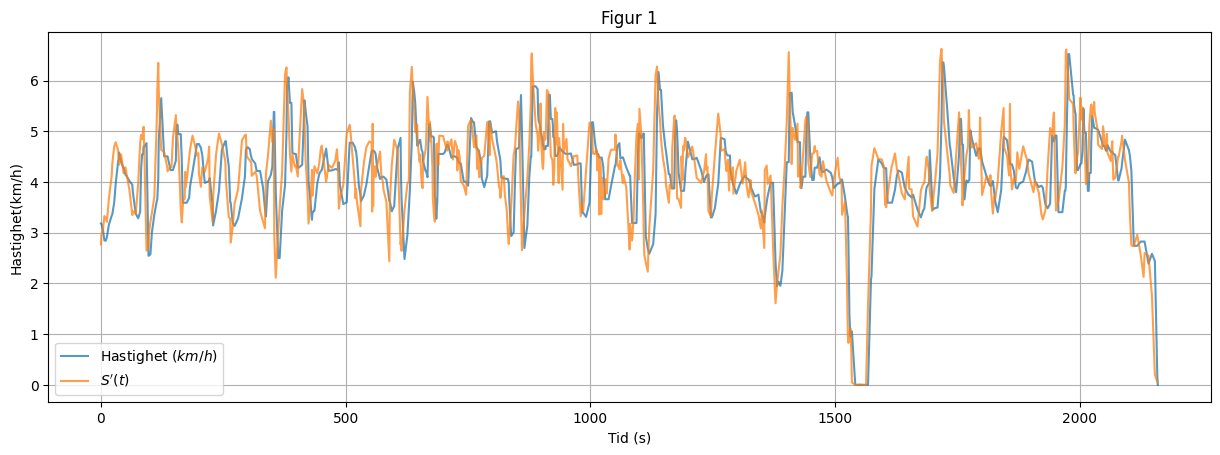

In [8]:
sns.palette="muted"
sns.lineplot(data=df, x="Time", y="Speed", alpha=0.75, label="Hastighet ($km/h$)")
sns.lineplot(data=df, x="Time", y="Speed_from_dist", alpha=0.75, label="$S'(t)$")
plt.gcf().set_figwidth(15)
plt.title("Figur 1")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet(km/h)")
plt.legend()
plt.grid()
plt.show()

Ut i fra grafen, så kan vi se at det er en sammenheng mellom Hastigheten og $S'(t)$, men at de ikke er helt like. Dersom vi plotter punkter gitt ved x= V(t) og y= $S'(t)$ så får vi følgene plott

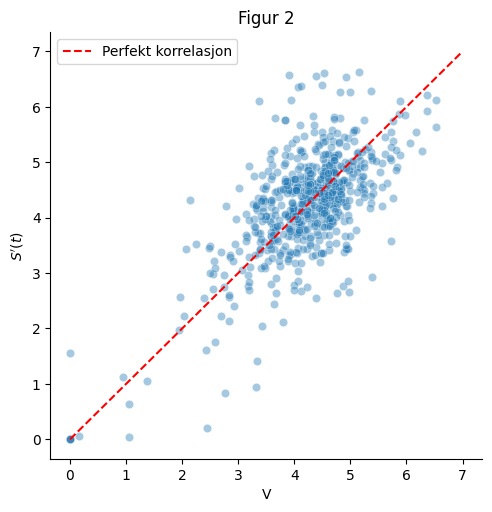

In [9]:
sns.relplot(data=df, x="Speed", y="Speed_from_dist", alpha=0.4)
plt.plot([0,7],[0,7],"r",linestyle="--", label= "Perfekt korrelasjon")
plt.title("Figur 2")
plt.xlabel("V")
plt.ylabel("$S'(t)$")
plt.legend()
plt.show()

Da kan vi se at det er en ganske god sammenheng mellom farten og $S'(t)$. Dette gir mening siden $S'(t)$ bare er et annet utrykk for fart. Ved perfekt korelasjon, altså at $S'(t)$=V(t), så vil r=1 og alle punktene ville ligget på den rød linjen. Da hadde y=x, eller $S'(t)=V(t)$. for å finne korrelasjonskoeffisienten så kan vi gjøre en korrelasjonsanalyse, da får vi en korrelasjon på:

In [10]:
korrelasjon_Speed_Speed_from_dist=df["Speed"].corr(df["Speed_from_dist"])
print("r = ", korrelasjon_Speed_Speed_from_dist)

r =  0.6683399607747841


Det er ikke like bra som forventet, men dersom vi ser tilbake på Figur 1, så ser vi at dataen muligens er forskjøvet. Om vi zoomer mer inn på plottet, så kan vi se at dette stemmer

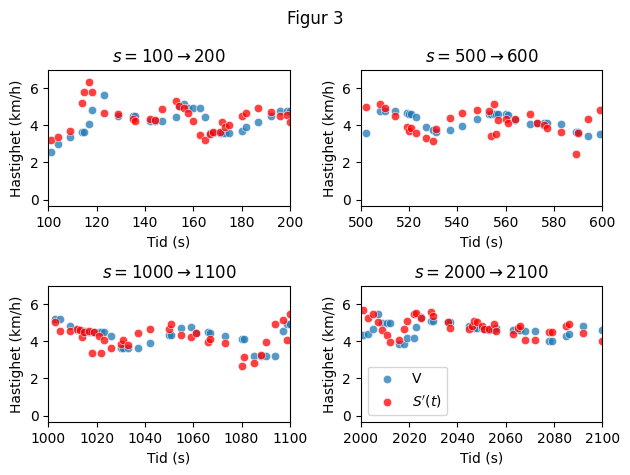

In [11]:
plt.suptitle("Figur 3")

plt.subplot(2,2,1)
sns.scatterplot(data=df, x="Time", y="Speed", alpha=0.75)
sns.scatterplot(data=df, x="Time", y="Speed_from_dist", color="red", alpha=0.75)
plt.title(r"$ s= 100 \rightarrow 200$")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (km/h)")
plt.xlim([100,200])

plt.subplot(2,2,2)
sns.scatterplot(data=df, x="Time", y="Speed", alpha=0.75)
sns.scatterplot(data=df, x="Time", y="Speed_from_dist", color="red", alpha=0.75)
plt.title(r"$ s= 500 \rightarrow 600$")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (km/h)")
plt.xlim([500,600])

plt.subplot(2,2,3)
sns.scatterplot(data=df, x="Time", y="Speed", alpha=0.75)
sns.scatterplot(data=df, x="Time", y="Speed_from_dist", color="red", alpha=0.75)
plt.title(r"$ s= 1000 \rightarrow 1100$")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (km/h)")
plt.xlim([1000,1100])

plt.subplot(2,2,4)
sns.scatterplot(data=df, x="Time", y="Speed", alpha=0.75, label="V")
sns.scatterplot(data=df, x="Time", y="Speed_from_dist", color="red", alpha=0.75, label = "$S'(t)$")
plt.title(r"$ s= 2000 \rightarrow 2100$")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (km/h)")
plt.xlim([2000,2100])

plt.legend()
plt.gcf().tight_layout()
plt.show()

Det kan se ut som at alle farts punktene (V, de blå) er forskjøvet med ca 2-3 sekunder. Vi kan teste dette ved 

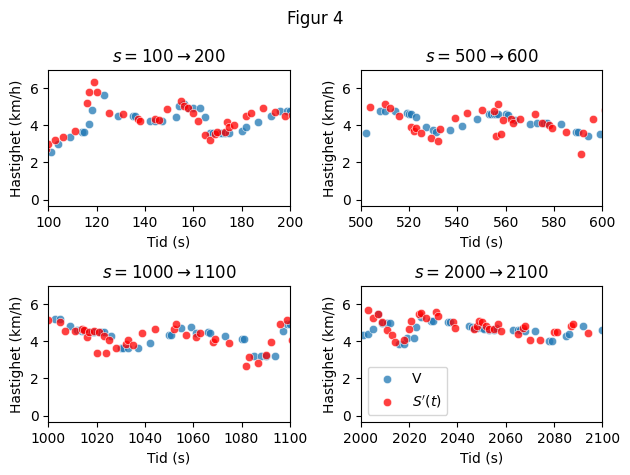

In [12]:
tid_2=df["Time"]+2
plt.suptitle("Figur 4")

plt.subplot(2,2,1)
sns.scatterplot(data=df, x="Time", y="Speed", alpha=0.75)
sns.scatterplot(data=df, x=tid_2, y="Speed_from_dist", color="red", alpha=0.75)
plt.title(r"$ s= 100 \rightarrow 200$")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (km/h)")
plt.xlim([100,200])

plt.subplot(2,2,2)
sns.scatterplot(data=df, x="Time", y="Speed", alpha=0.75)
sns.scatterplot(data=df, x=tid_2, y="Speed_from_dist", color="red", alpha=0.75)
plt.title(r"$ s= 500 \rightarrow 600$")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (km/h)")
plt.xlim([500,600])

plt.subplot(2,2,3)
sns.scatterplot(data=df, x="Time", y="Speed", alpha=0.75)
sns.scatterplot(data=df, x=tid_2, y="Speed_from_dist", color="red", alpha=0.75)
plt.title(r"$ s= 1000 \rightarrow 1100$")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (km/h)")
plt.xlim([1000,1100])

plt.subplot(2,2,4)
sns.scatterplot(data=df, x="Time", y="Speed", alpha=0.75, label="V")
sns.scatterplot(data=df, x=tid_2, y="Speed_from_dist", color="red", alpha=0.75, label = "$S'(t)$")
plt.title(r"$ s= 2000 \rightarrow 2100$")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (km/h)")
plt.xlim([2000,2100])

plt.legend()
plt.gcf().tight_layout()
plt.show()

Vi ser da at det passer mye bedre om vi forskyver $S'(t)$ med to sekunder. Dette kan tyde på at det er et filter for hastigheten, noe som vil senke ned tiden på målinger, men ikke strenkingen. I tilleg så er det flere topper i Figur 1 for $S'(t)$ enn for V. Toppene er også mer ekstreme. her kan klokken kan da ha bommet på én strekningsverdi, og da får vi en høyere fart. Det gir mening at det blir luket ut i presentasjonen av farten fordi dette gjør at grafen blir litt mer oversiktlig. Hvis vi kjører en korrelasjonsanalyse av $S(t+3)$ og V(t) så får vi

In [13]:
korrelasjon_Speed_Speed_from_dist_offsett3=df.Speed_from_dist.shift(2).corr(df["Speed"])
print("r = ", korrelasjon_Speed_Speed_from_dist_offsett3)

r =  0.9054353735444488


Dersom vi forskyver med 3 sek så får vi en korrelasjonskoeffisient på 

In [14]:
korrelasjon_Speed_Speed_from_dist_offsett3=df.Speed_from_dist.shift(3).corr(df["Speed"])
print("r = ", korrelasjon_Speed_Speed_from_dist_offsett3)

r =  0.7926989734243118


Altså passer en forsyvning på 2 sek en del bedre. Om vi plotter punkter ved x= v(t) og Y=$S(t+2)$ så ser vi at denne passer mye bedre. Spredningen på punktene er betydelig mindre

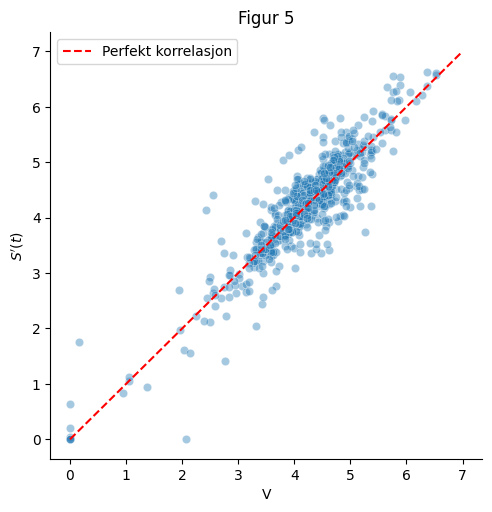

In [15]:
sns.relplot(data=df, x="Speed", y=df.Speed_from_dist.shift(2), alpha=0.4)
plt.plot([0,7],[0,7],"r",linestyle="--", label= "Perfekt korrelasjon")
plt.title("Figur 5")
plt.xlabel("V")
plt.ylabel("$S'(t)$")
plt.legend()
plt.show()

#### Sammenheng mellom puls og høydeendring

For å finne en sammenheng mellom puls og høydeendring så kan vi derivere høyden med hensyn på tiden for å finne høydeendringen. Da finner vi høydeforskjellen mellom hvert målingspunkt $\dot{h}=\frac{h_0-h_1}{T_0-T_1}$

In [16]:
df["Height_diff"] = (df.Alt.shift(-1)-df.Alt)/(df.Time.shift(-1)-df.Time)

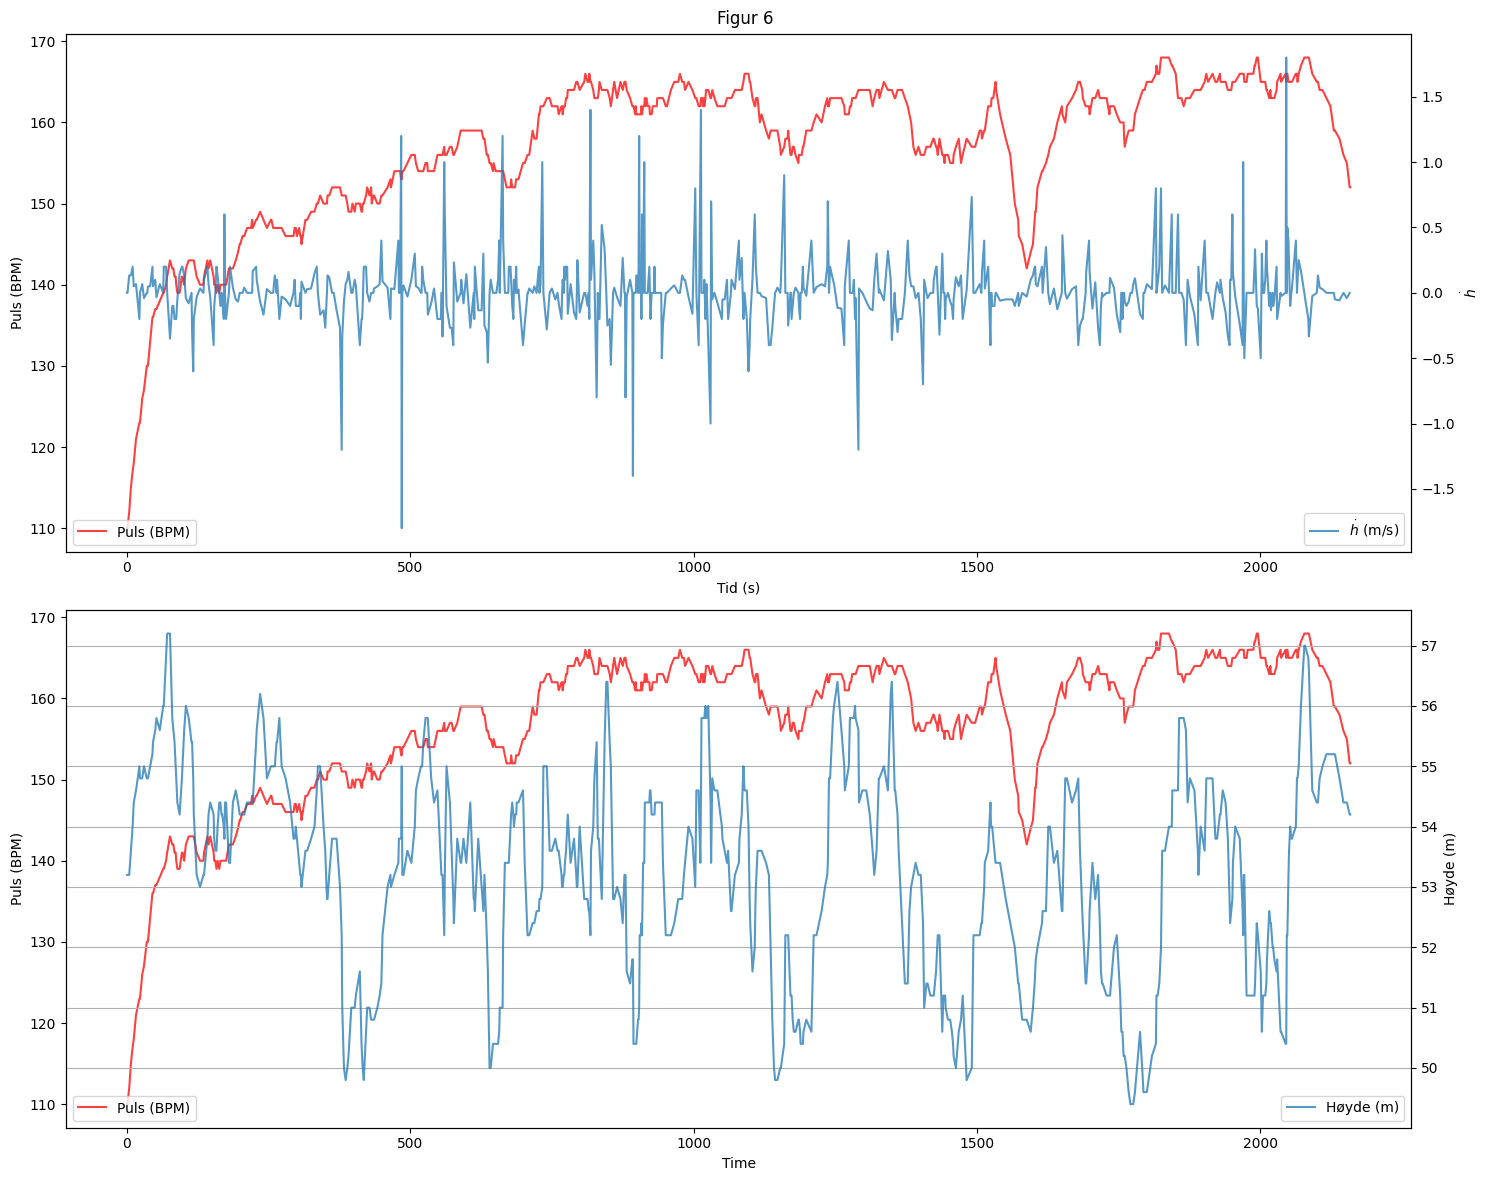

In [62]:
fig, (ax1, ax3) = plt.subplots(2,1,figsize=(15, 12))
plt.suptitle("Figur 6")
sns.lineplot(data=df, x="Time", y="Hr", alpha=0.75, label="Puls (BPM)",color="red", ax=ax1)

ax2 = ax1.twinx()

sns.lineplot(data=df, x="Time", y="Height_diff", alpha=0.75, label="$\dot{h}$ (m/s)",ax=ax2)

ax1.set_xlabel("Tid (s)")
ax1.set_ylabel("Puls (BPM)")
ax2.set_ylabel("$\dot{h}$")
ax1.legend(loc="lower left")
ax2.legend(loc="lower right")


sns.lineplot(data=df, x="Time", y="Hr", alpha=0.75, label="Puls (BPM)",color="red", ax=ax3)
ax4 = ax3.twinx()

sns.lineplot(data=df, x="Time", y="Alt", alpha=0.75, label="Høyde (m)",ax=ax4)

ax1.set_xlabel("Tid (s)")
ax3.set_ylabel("Puls (BPM)")
ax4.set_ylabel("Høyde (m)")
ax3.legend(loc="lower left")
ax4.legend(loc="lower right")
plt.tight_layout()
#plt.gcf().set_figwidth(15)
plt.grid()
plt.show()

#### Sammenheng mellom fart og stigning

### Analyse av puls

#### GPS

Her er løypen som ble gått.

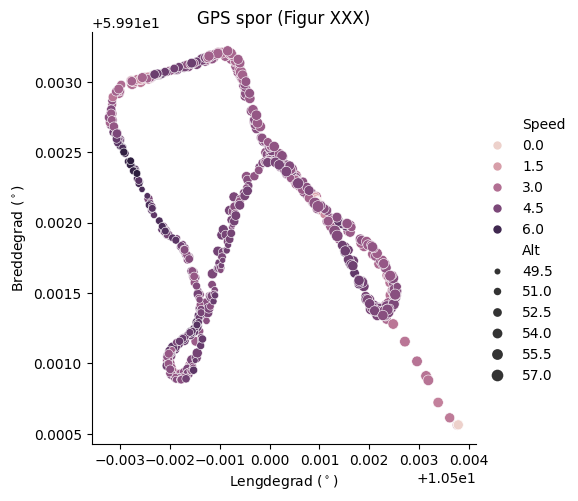

In [ ]:
sns.relplot(data=df, x="Long", y="Lat", hue ="Speed", size="Alt", label = "GPS spor")
plt.title("GPS spor (Figur XXX)")
plt.xlabel("Lengdegrad ($^\circ$)")
plt.ylabel("Breddegrad ($^\circ$)")
plt.show()

### Ekstra:

In [ ]:
Speed_Speed_from_dist=df[["Speed","Speed_from_dist"]]
#korrelasjon_Speed_Speed_from_dist=Speed_Speed_from_dist.corr()
print("r=",Speed_Speed_from_dist.corr())

r=                    Speed  Speed_from_dist
Speed            1.00000          0.66834
Speed_from_dist  0.66834          1.00000
